In [1]:
### Análisis de NetCrime - Esqueleto del Cuaderno (Preprocesamiento + Visualizaciones con Seaborn)

# 1. Import libraries
import pandas as pd
import seaborn as sns # Para visualizaciones
import matplotlib.pyplot as plt

In [2]:
# 1. Cargar dataset
df_base = pd.read_csv('data/LossFromNetCrime.csv')

# 2. Renombrar columna Country a pais
if 'Country' in df_base.columns:
 df_base.rename(columns={'Country': 'pais'}, inplace=True)


# 3. Normalizar nombres de columnas
df_base.columns = (
df_base.columns
.str.strip()
.str.lower()
.str.replace('-', '_')
)

In [3]:
# 4. Transformar de formato wide a largo
df_melt = df_base.melt(
id_vars=['pais'],
var_name='anio_tipo',
value_name='valor'
)


# 5. Separar 'anio_tipo' en 'anio' y 'tipo_incidente'
df_melt[['anio', 'tipo_incidente']] = (
df_melt['anio_tipo']
.str.split('_', expand=True)
)
# Convertir 'anio' a entero
df_melt['anio'] = df_melt['anio'].astype(int)


# 6. Pivotear para columnas de quejas y perdidas
df_limpios = (
df_melt
.pivot_table(
index=['pais', 'anio'],
columns='tipo_incidente',
values='valor'
)
.reset_index()
)
# Renombrar columnas sin caracteres especiales
df_limpios.rename(columns={
'complaints': 'quejas',
'losses': 'perdidas'
}, inplace=True)

In [4]:
# 7. Ordenar y revisar resultados
df_limpios = df_limpios.sort_values(['pais', 'anio']).reset_index(drop=True)


# Mostrar las primeras filas
df_limpios.head()

tipo_incidente,pais,anio,quejas,perdidas
0,AE,2019,5503.0,48101706.0
1,AE,2020,7390.0,81178182.0
2,AE,2021,10164.0,131934602.0
3,AE,2022,10042.0,187062157.0
4,AE,2023,11034.0,244238485.0


### 🔹 Ranking de Países por Pérdidas (Top 15)

Mostramos los 15 países con mayores pérdidas en el año elegido (`anio_objetivo = 2020`).  
Se usa un gráfico de **barras horizontales**, lo que facilita comparar rápidamente los valores.


Text(0.5, 1.0, 'Top 15 Países por Pérdidas - 2020')

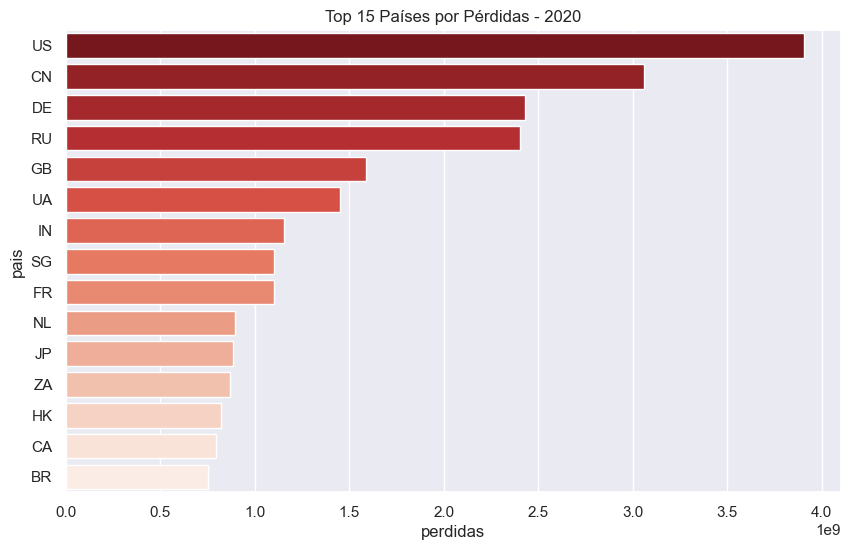

In [5]:
anio_objetivo = 2020
ranking_perdidas = (
    df_limpios[df_limpios['anio'] == anio_objetivo]
    .sort_values('perdidas', ascending=False)
    .head(15)
)

sns.set(rc={'figure.figsize': (10, 6)})
sns.barplot(
    data=ranking_perdidas,
    x='perdidas', y='pais',
    hue='pais',               # usamos pais como hue
    palette='Reds_r', 
    orient='h',
    dodge=False, legend=False # quitamos la leyenda
).set_title(f"Top 15 Países por Pérdidas - {anio_objetivo}")


### Relación entre Quejas y Pérdidas (Scatterplot)

Con un gráfico de dispersión se analiza si más quejas implican necesariamente más pérdidas.
Cada punto representa un país en el año elegido. El tamaño de los puntos es proporcional a las pérdidas.

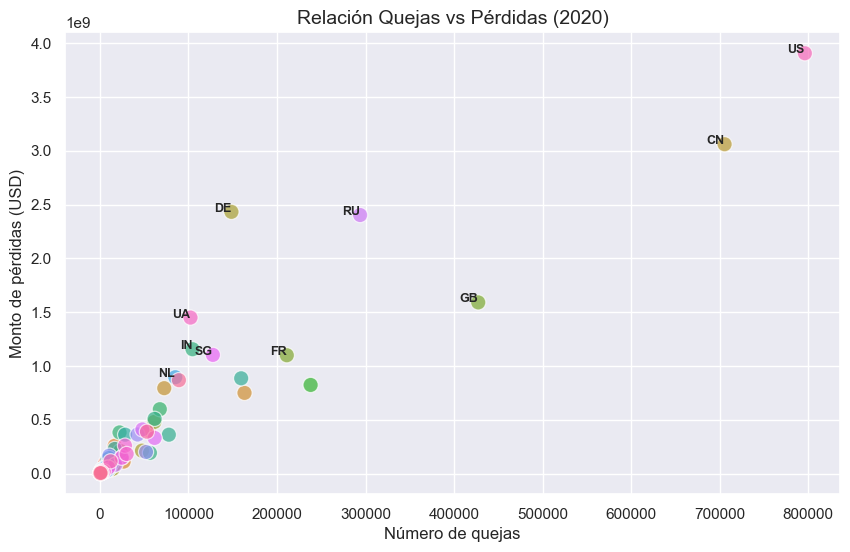

In [6]:


anio_objetivo = 2020
df_anio = df_limpios[df_limpios['anio'] == anio_objetivo]

# Scatterplot con colores por país
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=df_anio,
    x='quejas', y='perdidas',
    hue='pais',   # cada país con color distinto
    s=120, alpha=0.7, legend=False  # quitamos leyenda gigante
)

# Etiquetar solo los 10 países con más pérdidas
top = df_anio.sort_values('perdidas', ascending=False).head(10)
for _, fila in top.iterrows():
    plt.text(
        fila['quejas'], fila['perdidas'], fila['pais'],
        fontsize=9, ha='right', weight='bold'
    )

ax.set_title(f"Relación Quejas vs Pérdidas ({anio_objetivo})", fontsize=14)
ax.set_xlabel("Número de quejas")
ax.set_ylabel("Monto de pérdidas (USD)")
plt.show()


## 📊 Relación Quejas vs. Pérdidas (2020)

El análisis de la dispersión entre el número de **quejas** y el monto de **pérdidas económicas** muestra patrones interesantes:

### 🇺🇸 Estados Unidos (US)
- Se destaca con amplia diferencia: es el país con **mayor número de quejas** y, al mismo tiempo, el de **mayores pérdidas económicas**.  
- El volumen de incidentes y el impacto económico están **altamente correlacionados** en este país.

### 🇨🇳 China (CN), 🇷🇺 Rusia (RU) y 🇩🇪 Alemania (DE)
- Aunque tienen **menos quejas que EE.UU.**, presentan **pérdidas muy altas**.  
- Esto sugiere que los incidentes en estos países son, en promedio, **más costosos**.

### 🇬🇧 Gran Bretaña (GB) y 🇫🇷 Francia (FR)
- Presentan volúmenes **intermedios de quejas**, pero **pérdidas significativas**.  
- Confirman que el costo **no depende solo de la cantidad de incidentes**, sino también de la **gravedad y tipo de ataque**.


### 🌍 Otros países (NL, IN, SG, UA, etc.)
- Aparecen con un nivel **más bajo de quejas y pérdidas**.  
- Reflejan que, aunque los ataques son frecuentes, el **impacto monetario total** no alcanza al de los países líderes.

## 🧩 Conclusión general
- **Más quejas no siempre significan más pérdidas.**  
  - Ejemplo: Rusia y Alemania → menos quejas que otros países, pero pérdidas elevadas.  
- **EE.UU. domina en ambas métricas**, convirtiéndose en el mercado más crítico en términos de ciberdelitos.  
- El impacto económico está **altamente concentrado** en pocos países, mientras que la mayoría mantiene niveles relativamente bajos.


## Correlaciones
* Diagrama de dispersión múltiple
    * Comparar “Complaints vs. Losses” en varios años.
    
* Bubble chart
    * Eje X: año, 
    * Eje Y: pérdidas, 
    * Tamaño de burbuja: número de quejas, 
    * Color: país.

Transforma tu los datos de CSV de incidentes de ciberseguridad en un formato más flexible y luego genera dos gráficos:

* Scatterplot múltiple: relación Quejas vs Pérdidas, coloreado por año.
* Bubble chart: Evolución temporal de pérdidas (Y) vs Año (X), con el tamaño de las burbujas representando las quejas y el color representando el país.

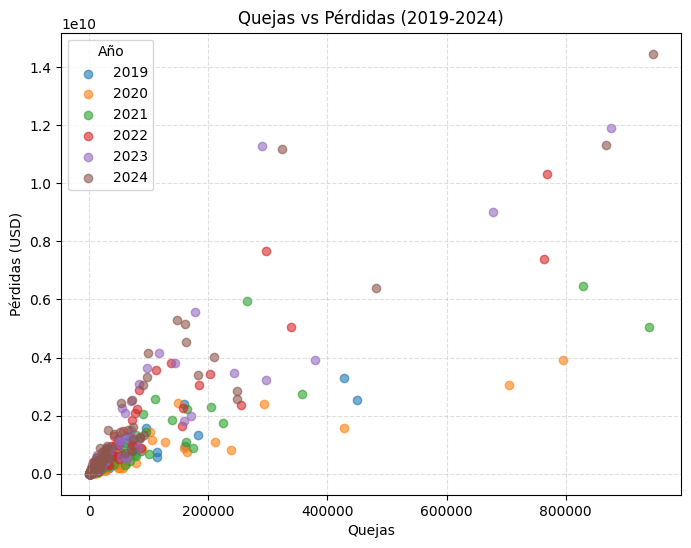

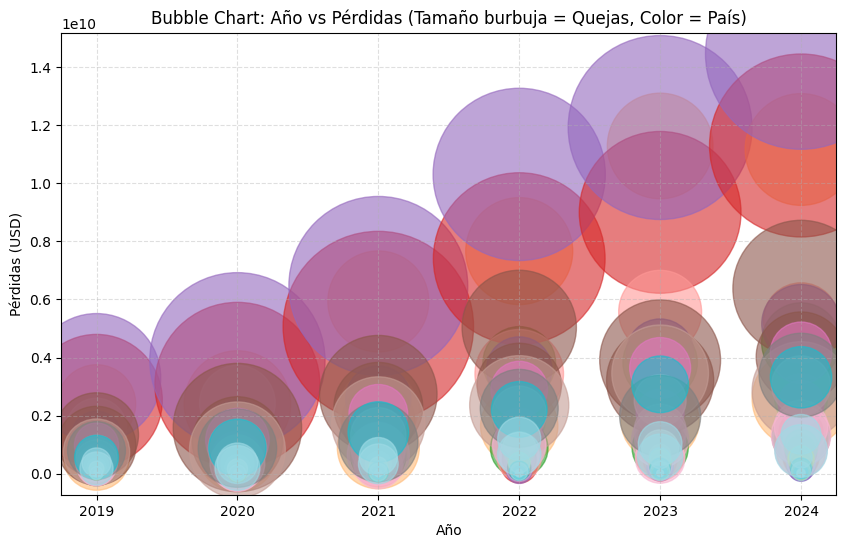

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
df_base = pd.read_csv("data/LossFromNetCrime.csv")

# Transformar a formato largo
registros = []
for anos in range(2019, 2025):
    for _, row in df_base.iterrows():
        registros.append({
            "Pais": row["Country"],
            "Año": anos,
            "Quejas": row[f"{anos}_Complaints"],
            "Pérdidas": row[f"{anos}_Losses"]
        })
        
long_df = pd.DataFrame(registros)

# ---- Scatter múltiple ----
fig, ax = plt.subplots(figsize=(8,6))
for year, group in long_df.groupby("Año"):
    ax.scatter(group["Quejas"], group["Pérdidas"], label=year, alpha=0.6)
ax.set_xlabel("Quejas")
ax.set_ylabel("Pérdidas (USD)")
ax.set_title("Quejas vs Pérdidas (2019-2024)")
ax.legend(title="Año")
ax.grid(True, linestyle="--", alpha=0.4)
plt.show()

# ---- Bubble Chart ----
fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(
    long_df["Año"],
    long_df["Pérdidas"],
    s=long_df["Quejas"]/50,    # escala de tamaño burbuja
    c=pd.factorize(long_df["Pais"])[0],  # colores por país
    alpha=0.6,
    cmap="tab20"
)
ax.set_xlabel("Año")
ax.set_ylabel("Pérdidas (USD)")
ax.set_title("Bubble Chart: Año vs Pérdidas (Tamaño burbuja = Quejas, Color = País)")
ax.grid(True, linestyle="--", alpha=0.4)
plt.show()


**🔄 1. Transformación de los datos**
```python
    df_base = pd.read_csv("data/LossFromNetCrime.csv")
```   
>Carga el CSV con columnas tipo 2019_Complaints, 2019_Losses, 2020_Complaints, etc.   
```python
    registros = []  
    for anos in range(2019, 2025):  
        for _, row in df_base.iterrows():  
            registros.append({  
                "Pais": row["Country"],  
                "Año": anos,  
                "Quejas": row[f"{anos}_Complaints"],  
                "Pérdidas": row[f"{anos}_Losses"]  
            })  
```

> Convierte la tabla de formato ancho (un par de columnas por año) a un formato largo donde cada fila representa:  
    - País (columna Country)  
    - Año (2019–2024)  
    - Quejas  
    - Pérdidas  

**📊 2. Gráfico de dispersión múltiple (Scatterplot)**
```python
    for year, group in long_df.groupby("Año"):
        ax.scatter(group["Quejas"], group["Pérdidas"], label=year, alpha=0.6)
```
> Crea un scatterplot donde:  
    - Eje X = número de quejas.  
    - Eje Y = pérdidas económicas (USD).  
    - Cada color representa un año distinto (2019–2024).  
Te permite ver si los países con más quejas también presentan más pérdidas, comparando entre años.  

🔵 3. Bubble Chart
```python
    scatter = ax.scatter(
        long_df["Año"],
        long_df["Pérdidas"],
        s=long_df["Pérdidas"]/50,
        c=pd.factorize(long_df["Pais"])[0],
        alpha=0.6,
        cmap="tab20"
        )
```

>Crea un gráfico de burbujas donde:  
    - Eje X = Año.  
    - Eje Y = Pérdidas (USD).  
    - Tamaño de la burbuja = número de quejas.  
    - Color = país.  
Esto te deja ver qué países tienen más pérdidas en cada año y con cuántas quejas se relaciona.

In [4]:
import pandas as pd
import plotly.express as px

# Cargar dataset
df = pd.read_csv("data/LossFromNetCrime.csv")

# Transformar a formato largo
records = []
for year in range(2019, 2025):
    for _, row in df.iterrows():
        records.append({
            "Pais": row["Country"],
            "Año": year,
            "Quejas": row[f"{year}_Complaints"],
            "Pérdidas": row[f"{year}_Losses"]
        })
long_df = pd.DataFrame(records)

# Limpieza básica
long_df["Pais"] = long_df["Pais"].astype(str).str.strip()
long_df = long_df.dropna(subset=["Pais", "Quejas", "Pérdidas", "Año"])
long_df = long_df[long_df["Pais"] != ""]

# 1) Scatter interactivo con animación por año
fig_scatter = px.scatter(
    long_df,
    x="Quejas",
    y="Pérdidas",
    animation_frame="Año",
    hover_name="Pais",
    labels={"Quejas": "Quejas", "Pérdidas": "Pérdidas (USD)"},
    title="Quejas vs Pérdidas (2019–2024) – animación por año"
)
fig_scatter.show()

# 2) Bubble chart (X=Año, Y=Losses, tamaño=Complaints, color=Country)
fig_bubble = px.scatter(
    long_df,
    x="Año",
    y="Pérdidas",
    size="Quejas",
    color="Pais",
    hover_name="Pais",
    size_max=40,
    labels={"Año": "Año", "Pérdidas": "Pérdidas (USD)", "Quejas": "Quejas"},
    title="Bubble Chart: Año vs Pérdidas (size=Quejas, color=Pais)"
)
fig_bubble.show()


[Quejas vs Pérdidas (2019–2024) – animación por año](https://rawcdn.githack.com/anmerinoto/Tramiento_Datos_Incidentes_Ciberseguridad/33ed7b3e206422753d61405d1e1a9235fa5d5980/interactive_bubble_year_losses.html)  
[Bubble Chart: Año vs Pérdidas (size=Quejas, color=Pais)](interactive_scatter_complaints_losses.html)

In [ ]:
import plotly.io as pio
pio.write_html(fig_scatter, file="interactive_scatter_complaints_losses.html", include_plotlyjs="cdn")
pio.write_html(fig_bubble, file="interactive_bubble_year_losses.html", include_plotlyjs="cdn")